# Run Maxent model

In [1]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd

import elapid as ela
from sklearn import metrics
import matplotlib.pyplot as plt
# import rasterio as rio
import rioxarray as rioxr

In [2]:
out_path = os.path.join(os.sep, 'mnt', 'jmeijer_workspace', 'checkouts', 'aciar', 'out')

input_path = os.path.join(out_path, 'input')
output_path = os.path.join(out_path, 'output')
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [3]:
specie = 'leptocybe-invasa'
pseudoabsence = 'random' #'bias-forest' #
training = 'east-asia'
interest = 'south-east-asia'
bioclim = list(np.arange(1,20))#[1, 5, 6, 12, 13, 14]# [1, 16, 6, 11] #

## 1. Train model for region of specie occurences

### 1.1 load predictive variable data

In [4]:
rasters, labels = ['srtm_%s.tif' %training], ['srtm_elev']#['srtm_east_asia.tif'], ['srtm_elev'] #, 'ndvi_east-asia.tif', 'ndvi'
for no in bioclim:
    rasters.append('wc2.1_10m_bio-%02d_%s.tif' %(no, training))
    labels.append('bioclim_%02d' %no)

raster_paths = [os.path.join(input_path, raster) for raster in rasters]
# rasters, raster_paths, labels

### 1.2 load and merge presence and background data

In [5]:
presence_file_name = '%s_presence_%s.csv' %(specie, training)
background_file_name = '%s_background_%s_%s.csv' %(specie, pseudoabsence, training)

presence_csv = pd.read_csv(os.path.join(input_path, presence_file_name))
geometry = gpd.points_from_xy(presence_csv['lon'], presence_csv['lat'])
presence_gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

background_csv = pd.read_csv(os.path.join(input_path, background_file_name))
geometry = gpd.points_from_xy(background_csv['lon'], background_csv['lat'])
background_gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

In [6]:
presence_train = ela.annotate(
    presence_gdf.geometry,
    raster_paths=raster_paths, 
    labels=labels, 
    drop_na=True,
)

background_train = ela.annotate(
    background_gdf, #pseudoabsence_random, pseudoabsence_bias_eucalyptus, #pseudoabsence_bias_perc_planted
    raster_paths=raster_paths, 
    labels=labels, 
    drop_na=True
)

train = ela.stack_geodataframes(
    presence_train,
    background_train,
    add_class_label=True,
)

# train.describe()

Raster:   0%|                              | 0/20 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/elapid/geo.py:468: RuntimeWarning: invalid value encountered in cast
  samples = np.array(samples_iter, dtype=dtype)


Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Raster:   0%|                              | 0/20 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

### 1.3 run model

In [7]:
experiment_name = 'exp_%s_%s' %(pseudoabsence, training)
run_name = '%s_%s_%s.ela' %(specie, pseudoabsence, training)
raster_name = 'model-train_%s_%s_%s.tif' %(specie, pseudoabsence, training)

exp_path = os.path.join(output_path, experiment_name)
if not os.path.exists(exp_path):
    os.makedirs(exp_path)

In [8]:
# split the x/y data
x = train.drop(columns=['class', 'geometry'])
y = train['class']

# train the model
model_train = ela.MaxentModel(transform='logistic', beta_multiplier=1.5)
print(model_train.get_params())
model_train.fit(x, y)

# save the fitted model to disk
ela.save_object(model_train, os.path.join(exp_path, run_name))

# write the model predictions to disk
ela.apply_model_to_rasters(model_train, raster_paths, os.path.join(exp_path, raster_name), quiet=True)

{'beta_categorical': 1.0, 'beta_hinge': 1.0, 'beta_lqp': 1.0, 'beta_multiplier': 1.5, 'beta_threshold': 1.0, 'clamp': True, 'class_weights': 100, 'convergence_tolerance': 2e-06, 'feature_types': ['linear', 'hinge', 'product'], 'n_cpus': 32, 'n_hinge_features': 10, 'n_lambdas': 100, 'n_threshold_features': 10, 'scorer': 'roc_auc', 'tau': 0.5, 'transform': 'logistic', 'use_lambdas': 'best', 'use_sklearn': True}


In [9]:
# evaluate training performance
y_predict = model_train.predict(x)
auc = metrics.roc_auc_score(y, y_predict)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.984


In [10]:
# experiment_name = 'exp_%s_%s' %('random', interest)
# raster_name = 'model-pred_%s_%s_%s.tif' %(specie, 'random', interest)
# exp_path = os.path.join(output_path, experiment_name)
train_out = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

# experiment_name = 'exp_%s_%s' %('bias-forest', region)
# raster_name = 'model-pred_%s_%s_%s.tif' %(specie, 'bias-forest', region)
# exp_path = os.path.join('output', experiment_name)
# pred_bias = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

In [11]:
# model.permutation_importance_plot(x,y)
# model.partial_dependence_plot(x)
# model.

## 2. Predict model for region of interest

(!) continue here, use instead of x from training a xpred for area of interest

In [12]:
rasters, labels = ['srtm_%s.tif' %interest], ['srtm_elev']#['srtm_east_asia.tif'], ['srtm_elev'] #, 'ndvi_east-asia.tif', 'ndvi'
for no in bioclim:
    rasters.append('wc2.1_10m_bio-%02d_%s.tif' %(no, interest))
    labels.append('bioclim_%02d' %no)

raster_paths = [os.path.join(input_path, raster) for raster in rasters]

In [13]:
presence_file_name = '%s_presence_%s.csv' %(specie, interest)
background_file_name = '%s_background_%s_%s.csv' %(specie, pseudoabsence, interest)

presence_csv = pd.read_csv(os.path.join(input_path, presence_file_name))
geometry = gpd.points_from_xy(presence_csv['lon'], presence_csv['lat'])
presence_gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

background_csv = pd.read_csv(os.path.join(input_path, background_file_name))
geometry = gpd.points_from_xy(background_csv['lon'], background_csv['lat'])
background_gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

In [14]:
presence_test = ela.annotate(
    presence_gdf.geometry,
    raster_paths=raster_paths, 
    labels=labels, 
    drop_na=True,
)

background_test = ela.annotate(
    background_gdf, #pseudoabsence_random, pseudoabsence_bias_eucalyptus, #pseudoabsence_bias_perc_planted
    raster_paths=raster_paths, 
    labels=labels, 
    drop_na=True
)

test = ela.stack_geodataframes(
    presence_test,
    background_test,
    add_class_label=True,
)

Raster:   0%|                              | 0/20 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Sample:   0%|                              | 0/8 [00:00<?, ?it/s]

Raster:   0%|                              | 0/20 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/1000 [00:00<?, ?it/s]

<Axes: >

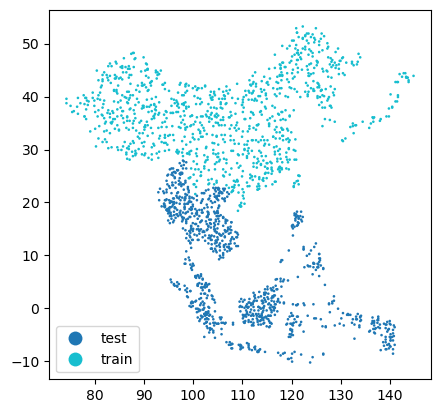

In [15]:
train['split'] = 'train'
test['split'] = 'test'
merged = ela.stack_geodataframes(train, test)

xmerge = merged.drop(columns=['class', 'split'])
ymerge = merged['class']

merged.plot(column='split', markersize=0.75, legend=True)

In [16]:
# set up model merged
model_merge = ela.MaxentModel(transform='logistic', beta_multiplier=1.5)
model_merge.fit(xmerge, ymerge)
ypred_merged = model_merge.predict(xmerge)

# evaluate training performance
auc = metrics.roc_auc_score(ymerge, ypred_merged)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.959


In [18]:
# train.iloc[np.where(train['class'] == 0)[0]]

In [19]:
# set up model test
xtrain = train.drop(columns=['class', 'split'])
ytrain = train['class']

model_test = ela.MaxentModel(transform='logistic', beta_multiplier=1.5)
model_test.fit(xtrain, ytrain)
# ytest = model_test.predict(xtest)
xtrain = train.iloc[np.where(train['class'] == 0)[0]].drop(columns=['class', 'split'])
ytrain_pred = model_test.predict(xtrain)

In [20]:
# evaluate training performance
auc = metrics.roc_auc_score(ytrain, ytrain_pred.iloc[np.where(train['class'] == 0)[0]])
print(f"Training AUC score: {auc:0.3f}")

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
xtest = test.drop(columns=['class', 'split'])
ytest = test['class']

model_test = ela.MaxentModel(transform='logistic', beta_multiplier=1.5)
model_test.fit(xtrain, ytrain)
# ytest = model_test.predict(xtest)
ytest = model_test.predict(train.iloc[np.where(train['class'] == 0)[0]])

In [17]:
experiment_name = 'exp_%s_%s' %(pseudoabsence, interest)
run_name = '%s_%s_%s_%s.ela' %(specie, pseudoabsence, training, interest)
raster_name = 'model-test_%s_%s_%s_%s.tif' %(specie, pseudoabsence, training, interest)

exp_path = os.path.join(output_path, experiment_name)
if not os.path.exists(exp_path):
    os.makedirs(exp_path)

In [18]:
# set up model test
xtrain = train.drop(columns=['class', 'split'])
ytrain = train['class']

xtest = test.drop(columns=['class', 'split'])
ytest = test['class']

model_test = ela.MaxentModel(transform='logistic', beta_multiplier=1.5)
model_test.fit(xtrain, ytrain)
# ytest = model_test.predict(xtest)
ytest = model_test.predict(train.iloc[np.where(train['class'] == 0)[0]])

# save the fitted model to disk
ela.save_object(model_test, os.path.join(exp_path, run_name))

# write the model predictions to disk
ela.apply_model_to_rasters(model_test, raster_paths, os.path.join(exp_path, raster_name), quiet=True)

SyntaxError: invalid syntax (758626103.py, line 1)

In [19]:
# evaluate training performance
auc = metrics.roc_auc_score(ytrain, ytest)
print(f"Training AUC score: {auc:0.3f}")

ValueError: Found input variables with inconsistent numbers of samples: [1034, 1008]

In [16]:
test_out = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

In [17]:
merged

,srtm_elev,bioclim_01,bioclim_02,bioclim_03,bioclim_04,bioclim_05,bioclim_06,bioclim_07,bioclim_08,bioclim_09,...,bioclim_13,bioclim_14,bioclim_15,bioclim_16,bioclim_17,bioclim_18,bioclim_19,geometry,class,split
0,2024,6,10,29,862,22,-11,34,15,-5,...,103,3,81,291,13,277,13,POINT (105.00000 35.00000),1,train
1,626,17,8,32,643,30,4,26,20,10,...,280,39,59,752,149,564,188,POINT (118.00000 26.25000),1,train
2,16,21,7,32,595,32,8,24,27,15,...,277,34,65,760,117,708,156,POINT (113.25000 23.50000),1,train
3,297,20,7,30,651,31,6,24,26,13,...,280,37,65,771,134,721,197,POINT (109.00000 24.00000),1,train
4,328,23,7,42,357,30,14,16,26,18,...,295,19,75,805,73,712,73,POINT (109.75000 19.25000),1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,14,26,9,47,266,34,14,19,27,23,...,1003,2,121,2664,9,1176,17,POINT (94.08333 19.25000),0,test
2038,318,25,10,58,194,34,15,18,26,23,...,236,2,78,569,27,354,42,POINT (101.25000 14.75000),0,test
2039,487,23,7,80,47,27,18,9,23,22,...,381,87,42,990,294,700,336,POINT (107.91667 -7.58333),0,test
2040,18,26,7,89,40,31,22,8,26,27,...,487,165,36,1220,524,710,1220,POINT (105.41667 -1.75000),0,test


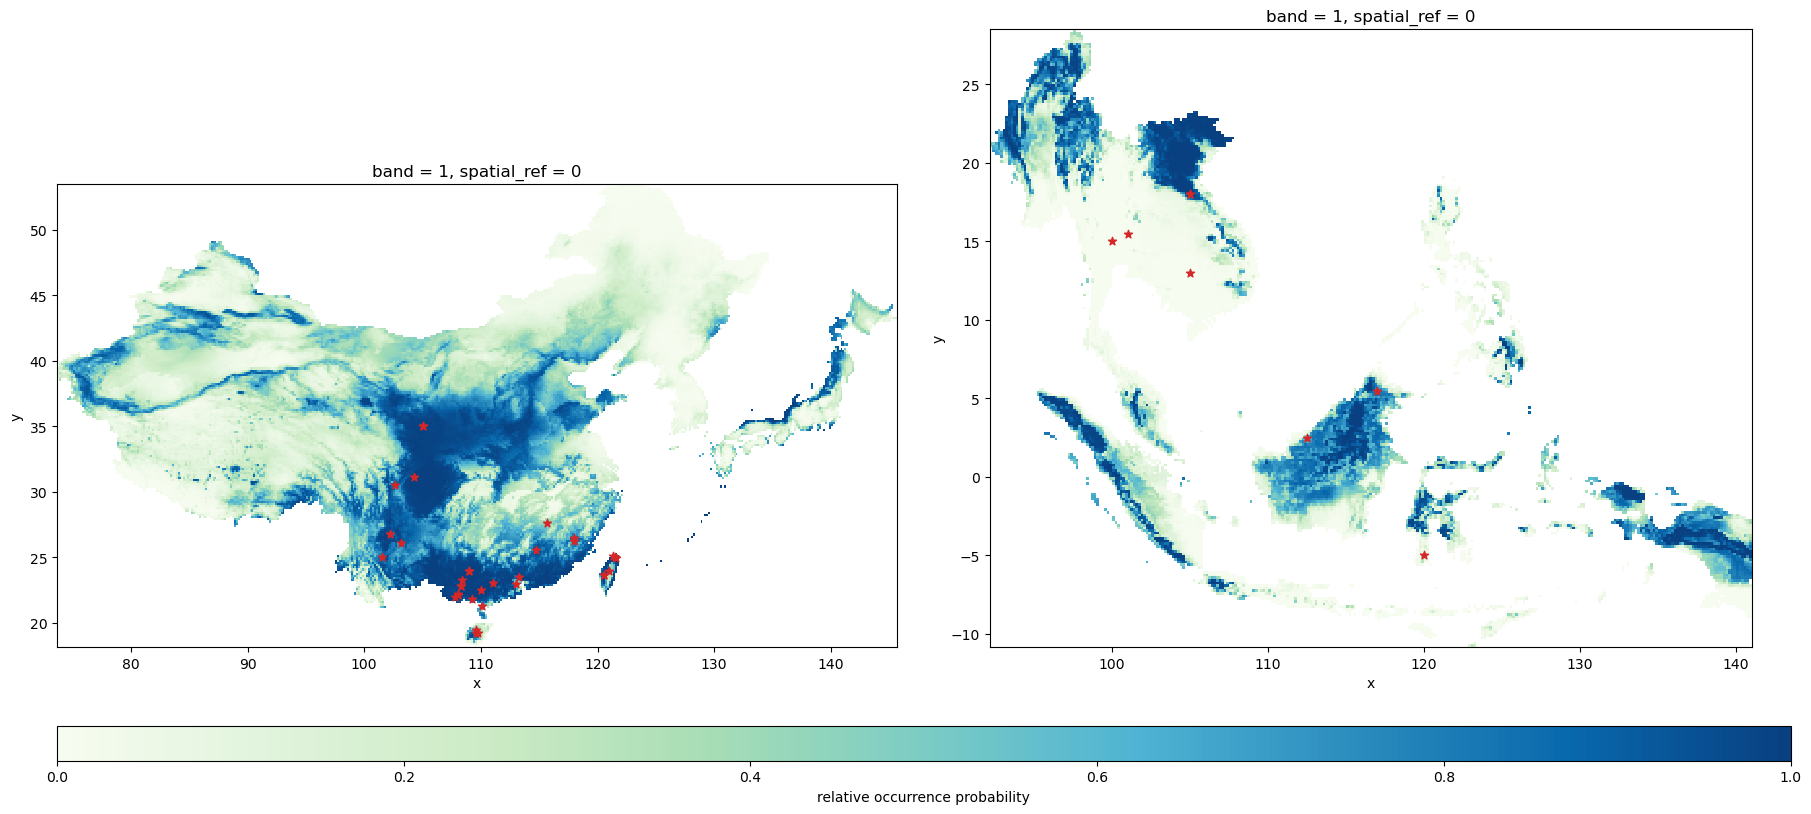

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True) #dpi=100

pcol = train_out.plot(ax=ax[0], vmin=0, vmax=1, cmap='GnBu', add_colorbar=False)
presence_train.plot(ax=ax[0], color='tab:red', marker='*')

pcol = test_out.plot(ax=ax[1], vmin=0, vmax=1, cmap='GnBu', add_colorbar=False)
presence_test.plot(ax=ax[1], color='tab:red', marker='*')

cbar = fig.colorbar(pcol, ax=ax, aspect=50, pad=0.05, label="relative occurrence probability", orientation='horizontal')

In [13]:
# split the x/y data
x_interest = merged.drop(columns=['class', 'geometry'])
y_interest = merged['class']

In [14]:
# evaluate training performance
y_interest = model.predict(x_interest)
auc = metrics.roc_auc_score(y, y_interest)
print(f"Training AUC score: {auc:0.3f}")

Training AUC score: 0.964


In [27]:
x_interest

,srtm_elev,bioclim_01,bioclim_16,bioclim_06,bioclim_11
0,2024,6,291,-11,-5
1,626,17,752,4,9
2,16,21,760,8,14
3,297,20,771,6,11
4,328,23,805,14,18
...,...,...,...,...,...
1029,2683,5,32,-16,-7
1030,5016,-6,52,-28,-19
1031,886,11,27,-15,-5
1032,5317,-4,148,-23,-14


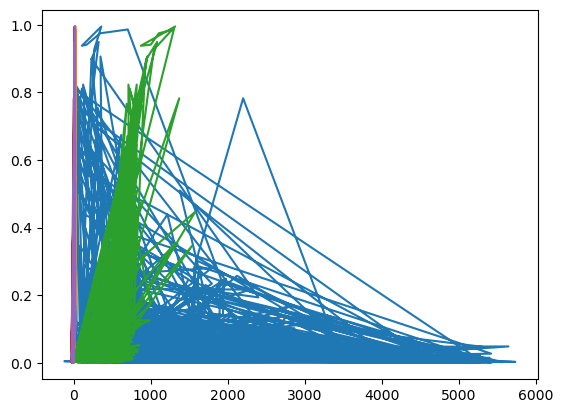

In [26]:
plt.plot(x_interest, y_interest)

In [17]:
raster_interest_name = 'model-pred_%s_%s_%s.tif' %(specie, pseudoabsence, interest)
ela.apply_model_to_rasters(model, rasters, os.path.join(exp_path, raster_interest_name), quiet=True)

RasterioIOError: srtm_south-east-asia.tif: No such file or directory

## 3. Plot occurence probability for training ind interest regions

In [15]:
pred_random = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

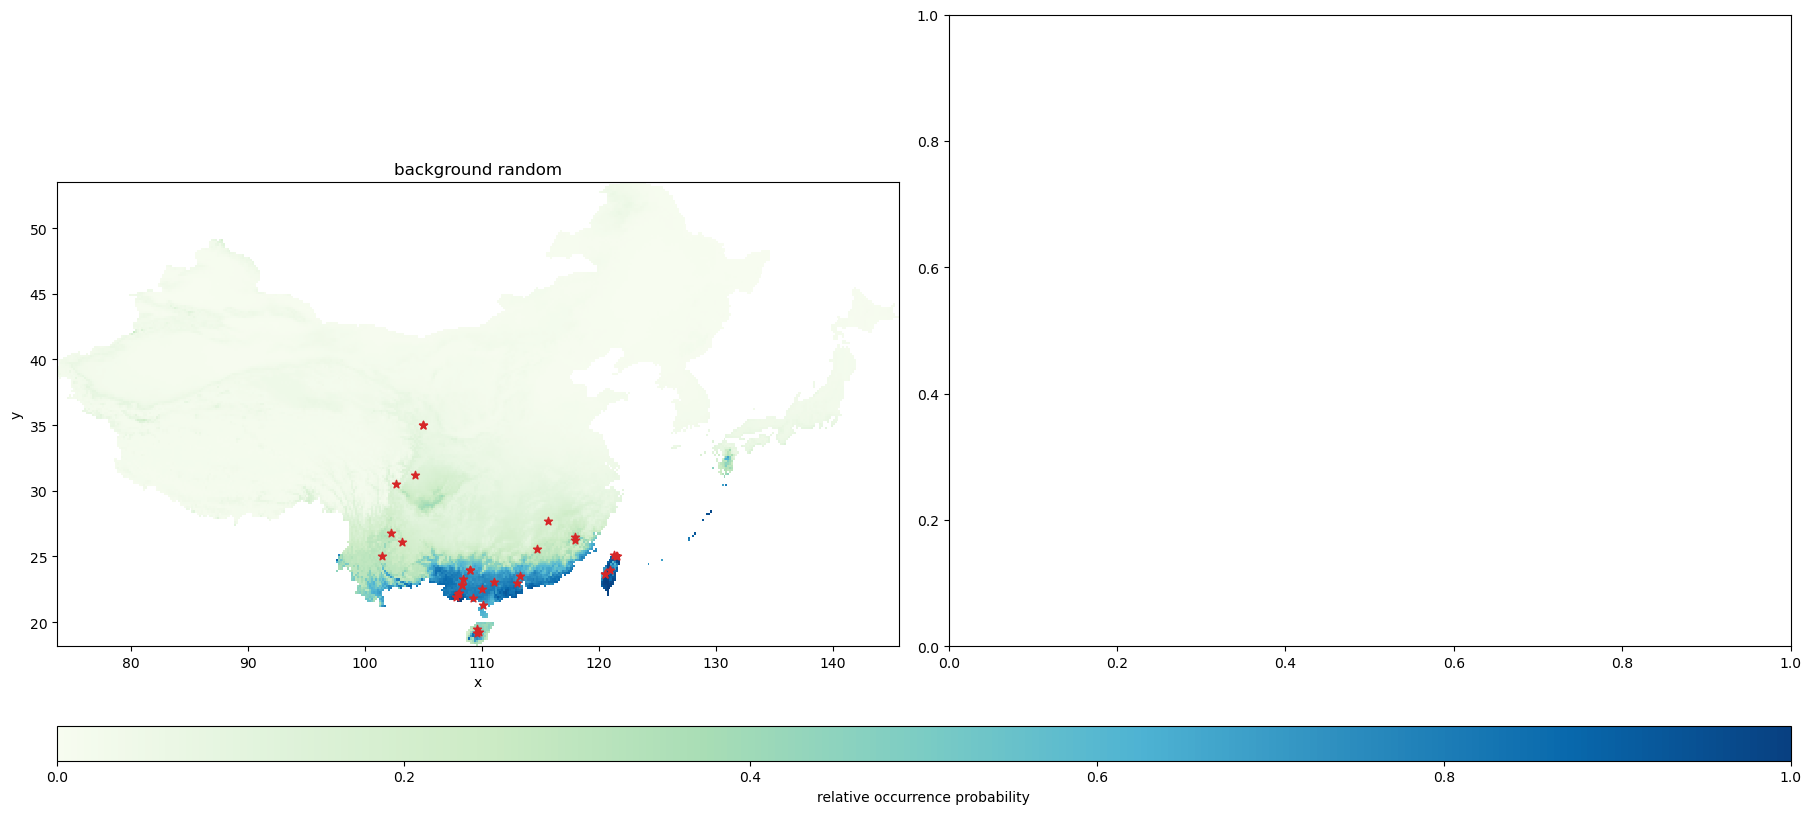

In [16]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True) #dpi=100
pcol = pred_random.plot(ax=ax[0], vmin=0, vmax=1, cmap='GnBu', add_colorbar=False)
presence.plot(ax=ax[0], color='tab:red', marker='*')
# ax[0].set_title('background random')

# pcol = pred_bias.plot(ax=ax[1], vmin=0, vmax=1, cmap='GnBu', add_colorbar=False)
# leptocybe_east_asia.plot(ax=ax[1], color='tab:red', marker='*')
# ax[1].set_title('background biased towards forest')

# wc_bio5_east_asia.plot(ax=ax[1])
# background.plot(ax=ax[0], markersize=1, color='tab:orange')
# leptocybe_east_asia.plot(ax=ax, color='tab:red', marker='*')

# cbar = fig.colorbar(pcol, ax=ax.ravel().tolist(), label="relative occurrence probability", orientation='horizontal')
cbar = fig.colorbar(pcol, ax=ax, aspect=50, pad=0.05, label="relative occurrence probability", orientation='horizontal')


In [1]:
# file_name_specie = 'L-invasa-aggregated.csv'
# specie_data_raw = pd.read_csv(os.path.join(data_path, 'species', 'leptocybe-invasa', file_name_leptocybe), usecols=['lat', 'lon', 'source'])

# # covert raw data to geopandas dataframe
# geometry = ela.xy_to_geoseries(
#     x = specie_data_raw['lon'],
#     y = specie_data_raw['lat'])

# # leptocybe = gpd.GeoDataFrame(df_cabi[["species", "year"]], geometry=geometry)
# gdf_specie = gpd.GeoDataFrame(df[['source']], geometry=geometry)

In [2]:
# count = 1000
# overestimate = 0.5
# pseudoabsence_random = ela.sample_raster(os.path.join('out', rasters[0]), count=count)

In [108]:
# rasters = ['srtm_east_asia.tif', 'ndvi_east_asia.tif']#, 

rasters, labels = ['srtm_east_asia.tif', 'ndvi_east-asia.tif'], ['srtm_elev', 'ndvi']#['srtm_east_asia.tif'], ['srtm_elev'] #, 'ndvi_east-asia.tif', 'ndvi'
for no in bioclim:
    rasters.append('wc2.1_10m_bio_%02d_east_asia.tif' %no)
    labels.append('bioclim_%02d' %no)

raster_paths = [os.path.join(input_path, raster) for raster in rasters]

# rasters = ['srtm_east_asia.tif', 'wc2.1_10m_bio_01_east_asia.tif', 'wc2.1_10m_bio_05_east_asia.tif', 'wc2.1_10m_bio_06_east_asia.tif', 'wc2.1_10m_bio_12_east_asia.tif', 'wc2.1_10m_bio_13_east_asia.tif', 'wc2.1_10m_bio_14_east_asia.tif']#, 'wc2.1_10m_bio_06_east_asia.tif', 'wc2.1_10m_bio_13_east_asia.tif', 'wc2.1_10m_bio_14_east_asia.tif']
# # labels = ['srtm', 'ndvi']#, 
# labels = ['srtm_elev', 'bioclim_01']#,'srtm_elev' 'bioclim_06', 'bioclim_13', 'bioclim_14']

In [109]:
rasters, raster_paths, labels

(['srtm_east_asia.tif',
  'ndvi_east-asia.tif',
  'wc2.1_10m_bio_01_east_asia.tif',
  'wc2.1_10m_bio_16_east_asia.tif',
  'wc2.1_10m_bio_06_east_asia.tif',
  'wc2.1_10m_bio_11_east_asia.tif'],
 ['input/srtm_east_asia.tif',
  'input/ndvi_east-asia.tif',
  'input/wc2.1_10m_bio_01_east_asia.tif',
  'input/wc2.1_10m_bio_16_east_asia.tif',
  'input/wc2.1_10m_bio_06_east_asia.tif',
  'input/wc2.1_10m_bio_11_east_asia.tif'],
 ['srtm_elev', 'ndvi', 'bioclim_01', 'bioclim_16', 'bioclim_06', 'bioclim_11'])

In [110]:
presence = ela.annotate(
    leptocybe_east_asia.geometry,
    raster_paths=raster_paths, 
    labels=labels, 
    drop_na=True,
)

background = ela.annotate(
    background_east_asia, #pseudoabsence_random, pseudoabsence_bias_eucalyptus, #pseudoabsence_bias_perc_planted
    raster_paths=raster_paths, 
    labels=labels, 
    drop_na=True
)

merged = ela.stack_geodataframes(
    presence,
    background,
    add_class_label=True,
)
merged.describe()

Raster:   0%|                              | 0/6 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/elapid/geo.py:468: RuntimeWarning: invalid value encountered in cast
  samples = np.array(samples_iter, dtype=dtype)


Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Sample:   0%|                              | 0/36 [00:00<?, ?it/s]

Raster:   0%|                              | 0/6 [00:00<?, ?it/s]

Sample:   0%|                              | 0/10000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/10000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/10000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/10000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/10000 [00:00<?, ?it/s]

Sample:   0%|                              | 0/10000 [00:00<?, ?it/s]

,srtm_elev,ndvi,bioclim_01,bioclim_16,bioclim_06,bioclim_11,class
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,1656.679474,118.780096,6.520064,326.457965,-13.714286,-6.122693,0.003311
std,1663.286278,69.544192,7.334762,239.480689,10.678780,9.236907,0.057445
min,-121.000000,1.000000,-11.000000,9.000000,-37.000000,-27.000000,0.000000
25%,365.000000,50.000000,0.000000,109.000000,-22.000000,-13.000000,0.000000
50%,1042.500000,108.000000,7.000000,316.000000,-16.000000,-7.000000,0.000000
75%,2526.500000,184.000000,12.000000,467.000000,-4.000000,1.000000,0.000000
max,6042.000000,254.000000,25.000000,2024.000000,17.000000,21.000000,1.000000


In [117]:
merged

,srtm_elev,ndvi,bioclim_01,bioclim_16,bioclim_06,bioclim_11,geometry,class
0,2024,135,6,291,-11,-5,POINT (105.00000 35.00000),1
1,626,192,17,752,4,9,POINT (118.00000 26.25000),1
2,16,129,21,760,8,14,POINT (113.25000 23.50000),1
3,297,196,20,771,6,11,POINT (109.00000 24.00000),1
4,328,232,23,805,14,18,POINT (109.75000 19.25000),1
...,...,...,...,...,...,...,...,...
9963,401,198,15,567,0,5,POINT (110.91667 29.58333),0
9964,1994,85,7,242,-13,-5,POINT (103.75000 35.58333),0
9965,4701,58,0,245,-17,-7,POINT (89.25000 29.75000),0
9966,907,37,11,34,-14,-5,POINT (85.41667 40.91667),0


# check the metrics package from sklearn
http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/applications/plot_species_distribution_modeling.html#

In [111]:
experiment_name = 'exp_%s_%s' %(pseudoabsence, region)
run_name = '%s_%s_%s.ela' %(specie, pseudoabsence, region)
raster_name = 'model-pred_%s_%s_%s.tif' %(specie, pseudoabsence, region)

exp_path = os.path.join('output', experiment_name)
if not os.path.exists(exp_path):
    os.makedirs(exp_path)

In [135]:
x

,srtm_elev,ndvi,bioclim_01,bioclim_16,bioclim_06,bioclim_11
0,2024,135,6,291,-11,-5
1,626,192,17,752,4,9
2,16,129,21,760,8,14
3,297,196,20,771,6,11
4,328,232,23,805,14,18
...,...,...,...,...,...,...
9963,401,198,15,567,0,5
9964,1994,85,7,242,-13,-5
9965,4701,58,0,245,-17,-7
9966,907,37,11,34,-14,-5


In [112]:
# split the x/y data
x = merged.drop(columns=['class', 'geometry'])
y = merged['class']

# train the model
model = ela.MaxentModel(transform='logistic', beta_multiplier=1.5)
print(model.get_params())
model.fit(x, y)

# evaluate training performance
ypred = model.predict(x)
auc = metrics.roc_auc_score(y, ypred)
print(f"Training AUC score: {auc:0.3f}")

# save the fitted model to disk
ela.save_object(model, os.path.join(exp_path, run_name))

# write the model predictions to disk
ela.apply_model_to_rasters(model, raster_paths, os.path.join(exp_path, raster_name), quiet=True)

{'beta_categorical': 1.0, 'beta_hinge': 1.0, 'beta_lqp': 1.0, 'beta_multiplier': 1.5, 'beta_threshold': 1.0, 'clamp': True, 'class_weights': 100, 'convergence_tolerance': 2e-06, 'feature_types': ['linear', 'hinge', 'product'], 'n_cpus': 32, 'n_hinge_features': 10, 'n_lambdas': 100, 'n_threshold_features': 10, 'scorer': 'roc_auc', 'tau': 0.5, 'transform': 'logistic', 'use_lambdas': 'best', 'use_sklearn': True}
Training AUC score: 0.967


In [113]:
model.permutation_importance_scores(x,y)

array([[ 2.83982248e-02,  3.47333425e-02,  3.66854250e-02,
         3.73503531e-02,  3.28239618e-02,  4.45425569e-02,
         3.40287627e-02,  2.77637980e-02,  2.81603148e-02,
         3.65054674e-02],
       [ 6.01332906e-03,  3.99719388e-03,  4.65602172e-03,
         7.65429839e-03,  2.08628815e-03,  6.30004118e-03,
         1.05732717e-02,  1.87430419e-03,  3.95754221e-03,
         7.58414543e-03],
       [ 2.92049839e-03,  6.94056824e-03,  5.26299736e-03,
         5.81507069e-03,  3.15840844e-03,  2.07256257e-03,
         5.34535084e-03,  1.04161901e-03,  1.66079517e-03,
         2.11221424e-03],
       [ 9.73753641e-03,  2.11633192e-02,  1.59048970e-02,
         1.40260176e-02,  1.77471748e-02,  1.07440789e-02,
         1.04665172e-02,  2.52474417e-02,  1.44469354e-02,
         8.52053499e-03],
       [ 1.62018270e-01,  2.12513154e-01,  2.32988669e-01,
         2.48239313e-01,  2.01639444e-01,  2.29535923e-01,
         2.17875280e-01,  1.86706013e-01,  1.76721416e-01,
         1.

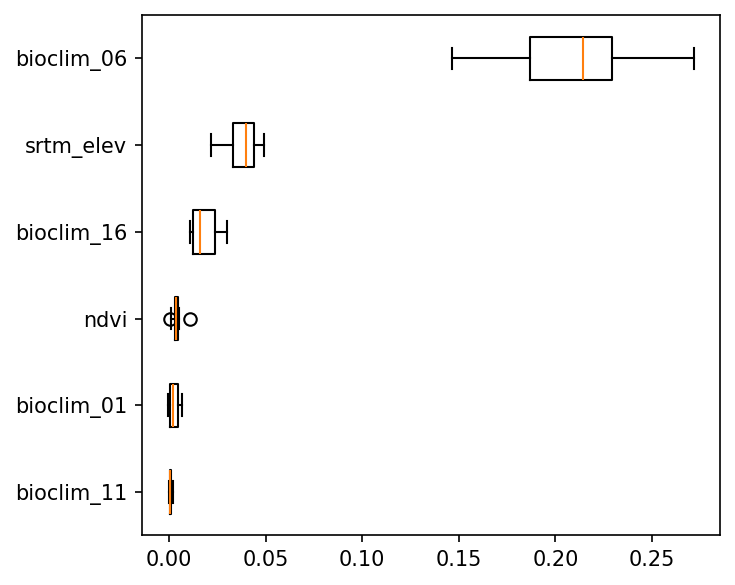

In [114]:
fig, ax = model.permutation_importance_plot(x,y)

In [129]:
x[x.isnull().any(axis=1)]

,srtm_elev,ndvi,bioclim_01,bioclim_16,bioclim_06,bioclim_11


In [131]:
help(model.partial_dependence_scores)

Help on method partial_dependence_scores in module elapid.models:

partial_dependence_scores(x: Union[numpy.ndarray, pandas.core.frame.DataFrame], percentiles: tuple = (0.025, 0.975), n_bins: int = 100, categorical_features: tuple = [None]) -> Tuple[numpy.ndarray, numpy.ndarray, numpy.ndarray] method of elapid.models.MaxentModel instance
    Compute partial dependence scores for each feature.
    
    Args:
        x: evaluation features. array-like of shape (n_samples, n_features).
            used to constrain the range of values to evaluate for each feature.
        percentiles: lower and upper percentiles used to set the range to plot.
        n_bins: the number of bins spanning the lower-upper percentile range.
        categorical_features: a 0-based index of which features are categorical.
    
    Returns:
        bins, mean, stdv: the binned feature values and the mean/stdv of responses.



/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(
/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be re

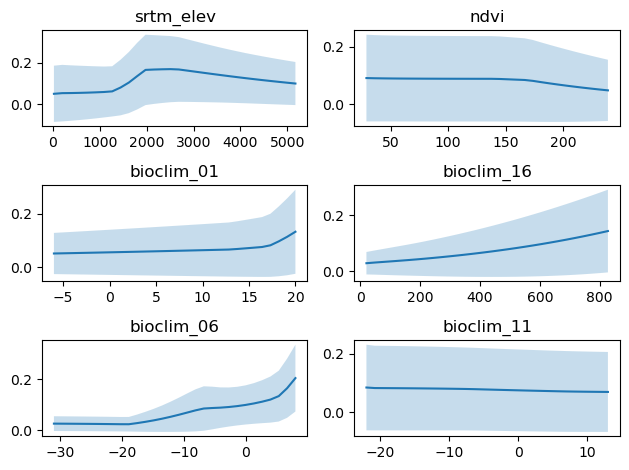

In [134]:
fig, ax = model.partial_dependence_plot(x, labels=labels, dpi=100, n_bins=30)

In [115]:
# and read into memory
# with rio.open(output_raster, 'r') as src:
#     pred = src.read(1, masked=True)

experiment_name = 'exp_%s_%s' %('random', region)
raster_name = 'model-pred_%s_%s_%s.tif' %(specie, 'random', region)
exp_path = os.path.join('output', experiment_name)
pred_random = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

experiment_name = 'exp_%s_%s' %('bias-forest', region)
raster_name = 'model-pred_%s_%s_%s.tif' %(specie, 'bias-forest', region)
exp_path = os.path.join('output', experiment_name)
pred_bias = rioxr.open_rasterio(os.path.join(exp_path, raster_name), masked=True)

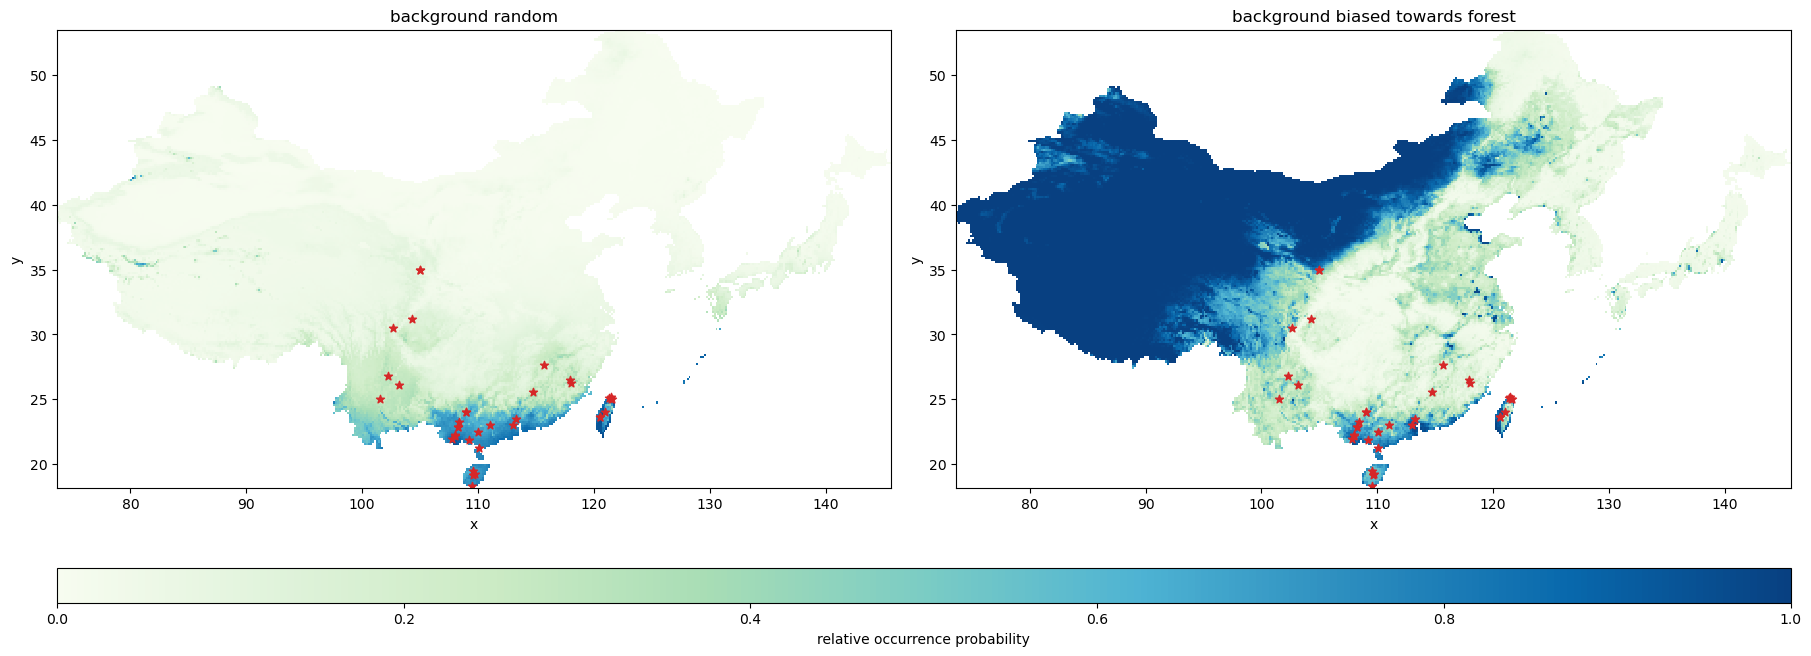

In [116]:
# plot the suitability predictions
fig, ax = plt.subplots(1, 2, figsize=(18, 8), constrained_layout=True) #dpi=100
pcol = pred_random.plot(ax=ax[0], vmin=0, vmax=1, cmap='GnBu', add_colorbar=False)
leptocybe_east_asia.plot(ax=ax[0], color='tab:red', marker='*')
ax[0].set_title('background random')

pcol = pred_bias.plot(ax=ax[1], vmin=0, vmax=1, cmap='GnBu', add_colorbar=False)
leptocybe_east_asia.plot(ax=ax[1], color='tab:red', marker='*')
ax[1].set_title('background biased towards forest')

# wc_bio5_east_asia.plot(ax=ax[1])
# background.plot(ax=ax[0], markersize=1, color='tab:orange')
# leptocybe_east_asia.plot(ax=ax, color='tab:red', marker='*')

# cbar = fig.colorbar(pcol, ax=ax.ravel().tolist(), label="relative occurrence probability", orientation='horizontal')
cbar = fig.colorbar(pcol, ax=ax, aspect=50, pad=0.05, label="relative occurrence probability", orientation='horizontal')


In [10]:
# fig, ax = model.partial_dependence_plot(x, labels=labels, dpi=100)

/opt/anaconda3/envs/aciar/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


ValueError: could not broadcast input array from shape (32,) into shape (50,)

In [ ]:
# x[['bioclim_05', 'bioclim_06']]

In [82]:
# labels[1:3]

['bioclim_05', 'bioclim_06']